In [14]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------
# Utilities
# ---------------------------------------------------------------
def validate_duplicates(df):
    """
    Remove the duplicate rows from dataframe.

    Parameters
    ----------
    df: Pandas dataframe
    
    Returns
    -------
    df: Pandas dataframe without duplicate rows 
    """    
    duplicate_rows_df = df[df.duplicated()]
    if duplicate_rows_df.shape[0] > 0:
       print('Number of rows before removing:', df.count()[0])
       print('Number of duplicate rows:', duplicate_rows_df.shape[0])
       df = df.drop_duplicates()
       print('Number of rows after removing:', df.count()[0])
    else:
       print('No duplicate rows.')
    return df

def drop_na(df, threshold_NaN):
    """
    Remove the columns from dataframe containing NaN depending on threshold_NaN.

    Parameters
    ----------
    df: Pandas dataframe
    threshold_NaN: in [0, 1], from GUI
    
    Returns
    -------
    df: Pandas dataframe 
    drop_cols: list of dropped columns
    """    
    isna_stat = (df.isna().sum()/df.shape[0]).sort_values(ascending=True)
    drop_cols = []
    if isna_stat.max() > 0.0:
       drop_cols = np.array(isna_stat[isna_stat > threshold_NaN].index)
       print('Drop columns containing more than', threshold_NaN*100,'% of NaN:', drop_cols)
       df = df.drop(drop_cols, axis=1)
    else:
       print('No need to drop columns.')
    return df, drop_cols

In [15]:
# ---------------------------------------------------------------
# Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("../datasets/waterQuality1.csv")


## Data Cleansing

In [16]:
# ---------------------------------------------------------------
# Normalize column names
# ---------------------------------------------------------------
df.columns = df.columns.str.lower().str.strip()

# ---------------------------------------------------------------
# Replace Excel / CSV errors with NaN
# ---------------------------------------------------------------
excel_errors = ["#NUM!", "#DIV/0!", "#REF!", "#VALUE!", "#NAME?", "#NULL!", "#N/A"]
df = df.replace(excel_errors, np.nan)

# Convert all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [17]:
# ---------------------------------------------------------------
# Check for duplicates
# ---------------------------------------------------------------
validate_duplicates(df)

No duplicate rows.


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [18]:
# ---------------------------------------------------------------
# Remove NaN value
# ---------------------------------------------------------------
threshold_NaN = 0.5
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


In [19]:
# ---------------------------------------------------------------
# Handle missing values
# ---------------------------------------------------------------
df = df.fillna(0)

## Dataframe Display

In [20]:
print("Dataset shape:", df.shape)
print(display(df))

Dataset shape: (7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


None


## Dataframe Statistics

In [21]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.00,0.040,0.070,0.280,5.05
ammonia,7999.0,14.272857,8.881569,-0.08,6.560,14.130,22.130,29.84
arsenic,7999.0,0.161445,0.252590,0.00,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.00,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.00,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.00,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.00,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.00,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.00,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.00,0.000,0.220,0.610,1.00


## Splitting dataframe in features and targets

In [22]:
# ---------------------------------------------------------------
# Split features and target
# ---------------------------------------------------------------
X = df.drop(columns=["is_safe"])
y = df["is_safe"]

In [23]:
from sklearn.model_selection import train_test_split

# ---------------------------------------------------------------
# Train/test split
# ---------------------------------------------------------------
# Notes:
# - Splits dataset into training and testing sets
# - X_train, y_train → used to train models
# - X_test, y_test → used to evaluate model performance
# - test_size=0.25 → 25% of data is reserved for testing
# - random_state=42 → ensures reproducible split (same split every run)
# - Formula (conceptually):
#       Training set: 75% of samples
#       Test set: 25% of samples
#       X_train, X_test, y_train, y_test = train_test_split(X, y, ...)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [24]:
# ---------------------------------------------------------------
# Random Forest Classifier
# ---------------------------------------------------------------
# Notes:
# - Random Forest is an ensemble method of decision trees.
# - Each tree is trained on a random bootstrap sample of the training data.
# - At each node, a random subset of features is used to find the best split.
# - Splitting criteria: Gini Impurity or Entropy
#   - Gini Impurity: G = 1 - sum(p_i^2), where p_i = proportion of class i in node
#   - Entropy: H = -sum(p_i * log2(p_i))
# - Predictions: majority vote of all trees
# - Parameters in this code:
#   - n_estimators=300 → number of trees
#   - max_depth=None → trees grow fully until leaves are pure
#   - random_state=42 → ensures reproducible results
# - rf.fit(X_train, y_train) → trains the forest
# - rf.predict(X_test) → predicts labels for test data
# - accuracy_score & classification_report → evaluate performance

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("===========================================")
print("Random Forest Results")
print("===========================================")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Results
Accuracy: 0.9595

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1755
         1.0       0.95      0.71      0.81       245

    accuracy                           0.96      2000
   macro avg       0.96      0.85      0.89      2000
weighted avg       0.96      0.96      0.96      2000



In [25]:
# ---------------------------------------------------------------
# 6. Logistic Regression Classifier
# ---------------------------------------------------------------
# Notes:
# - Logistic Regression is a linear model for classification.
# - Uses the sigmoid function to predict probabilities:
#       p(y=1|x) = 1 / (1 + exp(- (w^T * x + b)))
# - Predict class 1 if probability > 0.5, else class 0
# - Pipeline is used to ensure proper preprocessing:
#   1. StandardScaler → scales features to mean=0, std=1
#   2. LogisticRegression → fits model on scaled features
# - Parameters in this code:
#   - max_iter=20000 → allows more iterations for solver to converge
#   - class_weight="balanced" → penalizes majority class in imbalanced datasets
#   - solver="lbfgs" → optimization algorithm
# - logreg_pipeline.fit(X_train, y_train) → trains the pipeline
# - logreg_pipeline.predict(X_test) → predicts labels for test data
# - accuracy_score & classification_report → evaluate performance

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Pipeline: scale → logistic regression
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=20000,          # way more iterations
        class_weight="balanced", # penalize majority class
        solver="lbfgs"
    ))
])

logreg_pipeline.fit(X_train, y_train)

logreg_pred = logreg_pipeline.predict(X_test)

print("===========================================")
print("Logistic Regression Results")
print("===========================================")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))


Logistic Regression Results
Accuracy: 0.801

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88      1755
         1.0       0.36      0.77      0.49       245

    accuracy                           0.80      2000
   macro avg       0.66      0.79      0.68      2000
weighted avg       0.89      0.80      0.83      2000



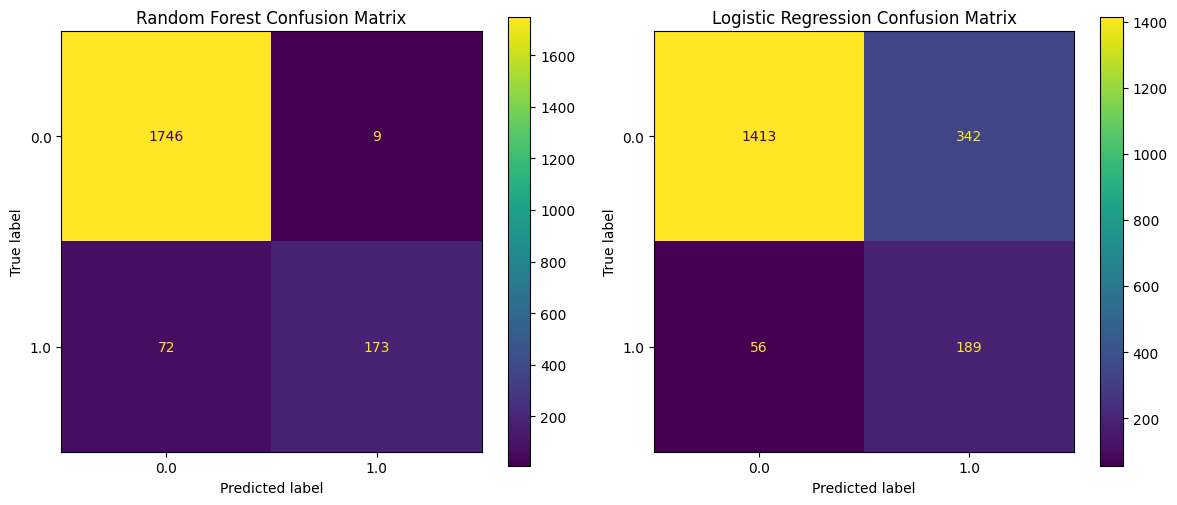

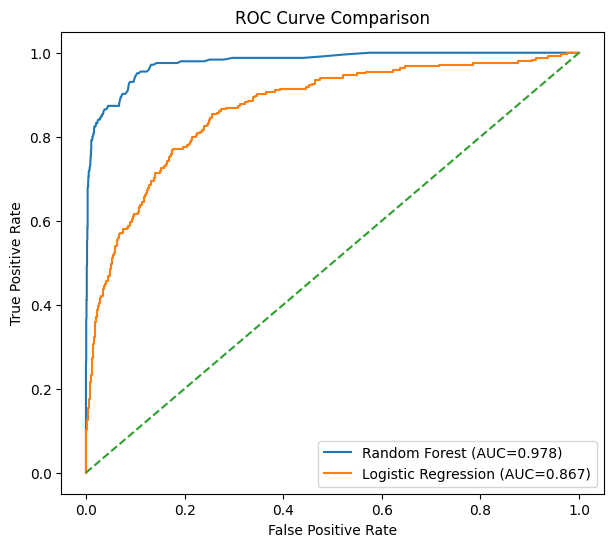

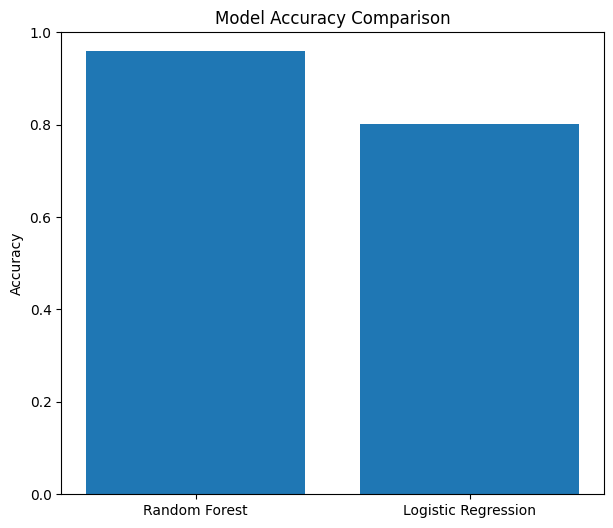

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# ---------------------------------
# CONFUSION MATRICES
# ---------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, ax=ax[1])
ax[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# ---------------------------------
# ROC CURVE COMPARISON
# ---------------------------------
rf_probs = rf.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, logreg_probs)

rf_auc = auc(rf_fpr, rf_tpr)
log_auc = auc(log_fpr, log_tpr)

plt.figure(figsize=(7, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC={rf_auc:.3f})")
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC={log_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ---------------------------------
# ACCURACY BAR CHART
# ---------------------------------
plt.figure(figsize=(7, 6))
plt.bar(["Random Forest", "Logistic Regression"], 
        [accuracy_score(y_test, rf_pred), accuracy_score(y_test, logreg_pred)])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
